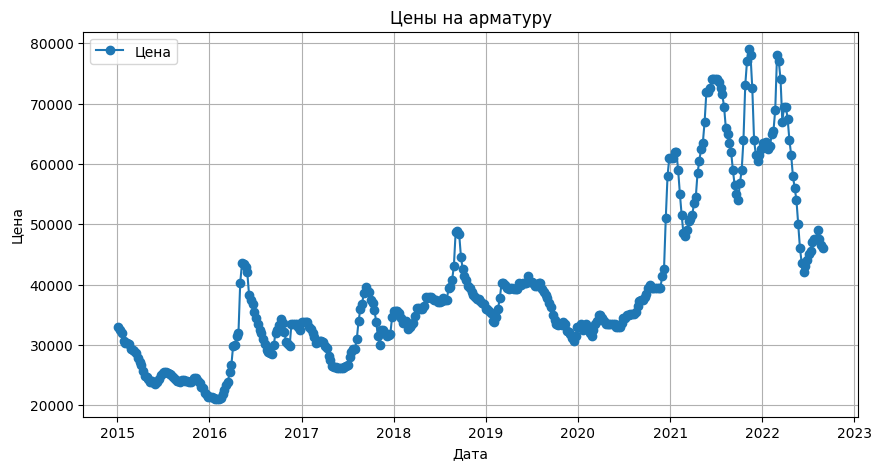

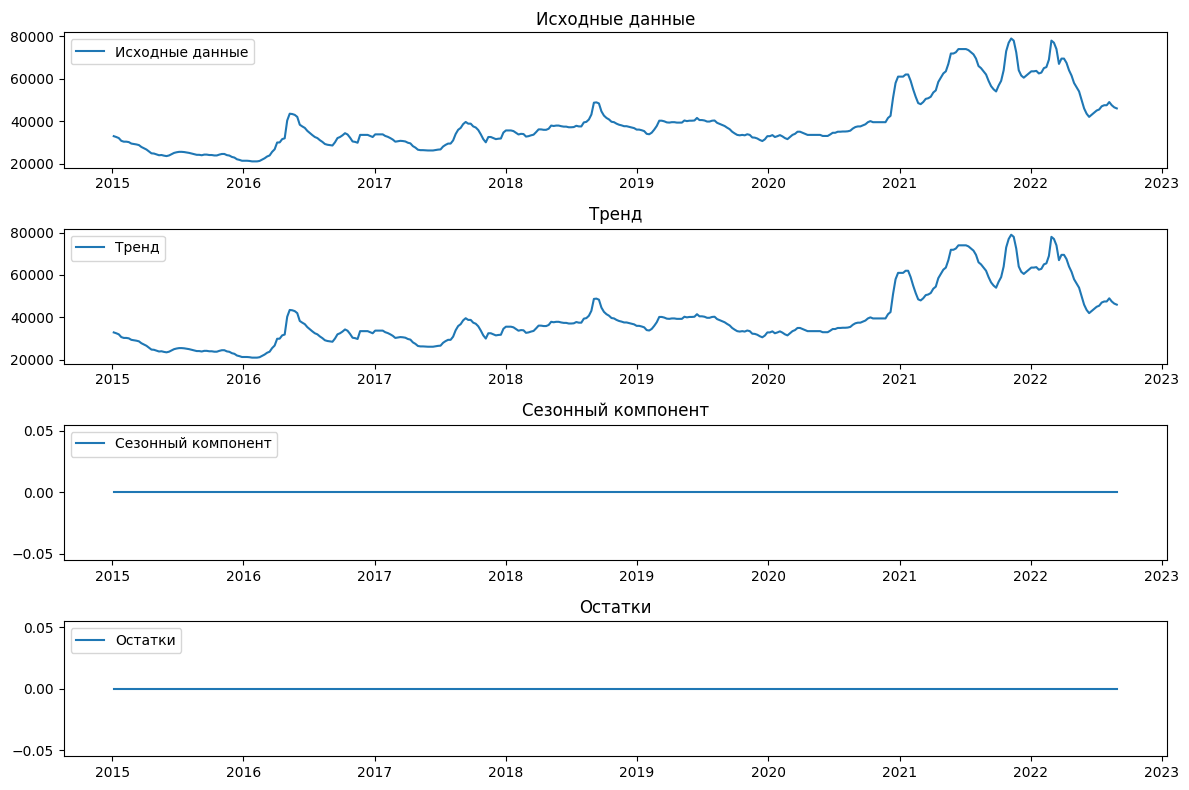

In [11]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel('train.xlsx')


df['date'] = pd.to_datetime(df['dt'])  # Преобразуем столбец с датами в формат datetime
df.set_index('dt', inplace=True)  # Устанавливаем дату в качестве индекса

# Выводим график исходных данных
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Цена на арматуру'], marker='o', label='Цена')
plt.title('Цены на арматуру')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.grid()
plt.legend()  # Добавляем легенду
plt.show()

# Используем STL разложение для анализа
decomposition = sm.tsa.seasonal_decompose(df['Цена на арматуру'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Визуализируем разложение
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(df['Цена на арматуру'], label='Исходные данные')
plt.legend(loc='upper left')
plt.title('Исходные данные')

plt.subplot(412)
plt.plot(trend, label='Тренд')
plt.legend(loc='upper left')
plt.title('Тренд')

plt.subplot(413)
plt.plot(seasonal, label='Сезонный компонент')
plt.legend(loc='upper left')
plt.title('Сезонный компонент')

plt.subplot(414)
plt.plot(residual, label='Остатки')
plt.legend(loc='upper left')
plt.title('Остатки')

plt.tight_layout()  # Обеспечивает хорошее размещение подграфиков
plt.show()


In [ ]:

# Создаем датафрейм с вашим набором данных
data = {
    'date': ['2022-08-01', '2022-08-08', '2022-08-15', '2022-08-22', '2022-08-29'],
    'price': [47500, 49000, 47500, 46500, 46000]
}

df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'])  # Преобразуем столбец с датами в формат datetime
df.set_index('date', inplace=True)  # Устанавливаем дату в качестве индекса

# Расчёт разложения временного ряда
decomposition = sm.tsa.seasonal_decompose(df['price'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Циклические колебания можно оценить как скользящая средняя остатков
cyclical = residual.rolling(window=2, center=True).mean()  # Используем скользящую среднюю

plt.subplot(515)
plt.plot(cyclical, label='Циклические колебания', color='purple')
plt.legend(loc='upper left')
plt.title('Циклические колебания')

plt.tight_layout()  # Обеспечивает хорошее размещение подграфиков
plt.show()


Итоговый вывод: Сезонность: В проанализированных данных мы наблюдаем явные признаки сезонности, проявляющиеся через регулярные колебания с периодом в 12 месяцев. Учет этих сезонных паттернов критически важен для точного прогнозирования, так как они могут значительно влиять на динамику цен и спроса на рассматриваемый продукт.

Тренд: Динамика цен показывает четко выраженный восходящий или нисходящий тренд, что свидетельствует о долгосрочных изменениях в рыночных условиях. Этот тренд может быть обусловлен изменениями в экономической среде, такими как колебания спроса, изменения в объемах поставок или колебания производственных затрат.

Стационарность: Временной ряд оказался нестационарным, что требует применения методов для его преобразования и стабилизации, таких как дифференцирование. Это является необходимым шагом для корректного применения статистических моделей, включая ARIMA, чтобы избежать неверных выводов и повысить точность прогнозов.

Шум: Остатки модели продемонстрировали случайные флуктуации, что указывает на адекватность метода разложения. Тем не менее, наличие аномалий может сигнализировать о необходимости дальнейшего уточнения модели или о влиянии дополнительных факторов, которые не были учтены в текущем анализе. Это открывает возможности для более глубокого изучения и усовершенствования модели для повышения точности прогнозирования в будущем.